In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100, centroids = None):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = centroids

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [ ]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia euclideana
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 1 0 0 1 0]
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]


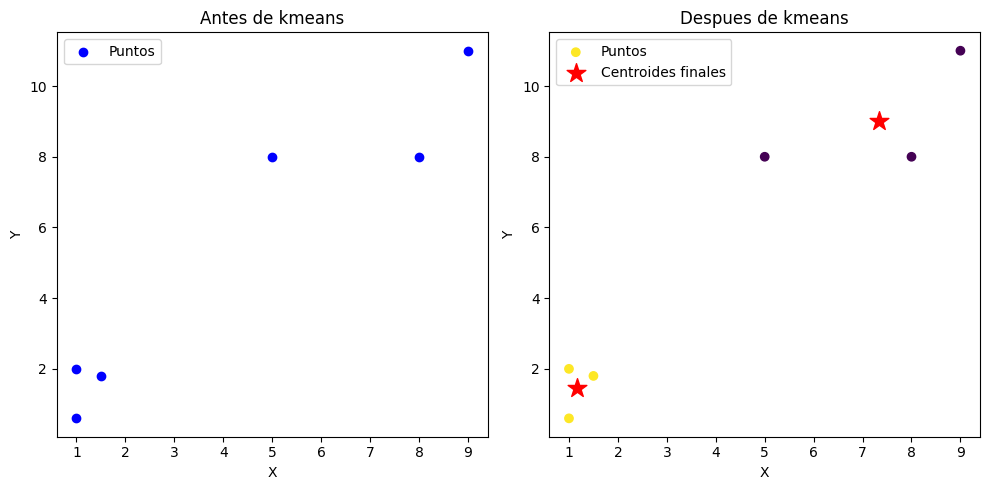

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 2 caracteristicas) usando distancia de Manhattan
points = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
kmeans = KMeans(k=2)
labels = kmeans.run(points, tipo_distance="mahalanobis")
print(labels)
print(kmeans.centroids)

[0 0 1 0 0 1]
[[2.875 3.1  ]
 [7.    9.5  ]]


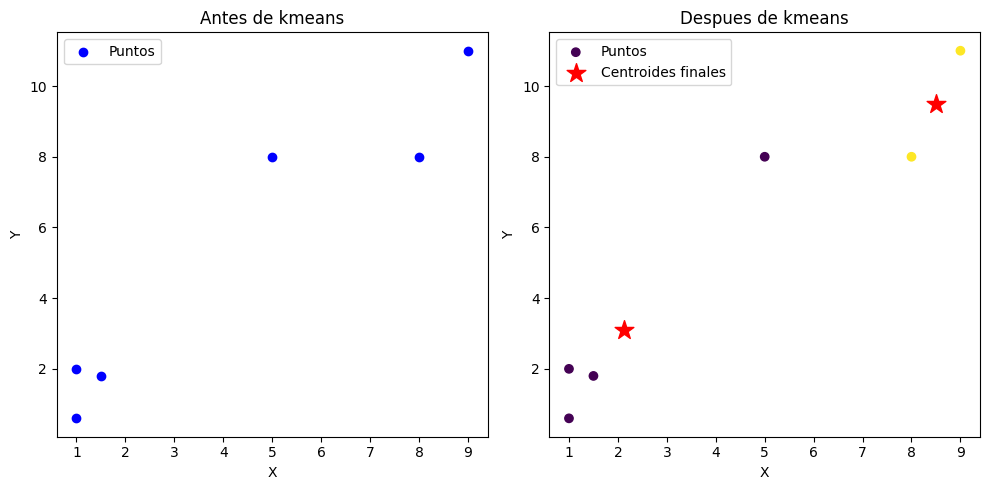

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

In [ ]:
# Ejemplo de uso (datos con 3 caracteristicas)
points = np.array([[1, 2, 0], [1.5, 1.8, 6], [-1, 5, 8], [3.2, 8, 8], [3, 1, 0.6], [-8, 9, 11]])
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 1 1 1 2 1]
[[ 1.     2.     0.   ]
 [-1.075  5.95   8.25 ]
 [ 3.     1.     0.6  ]]


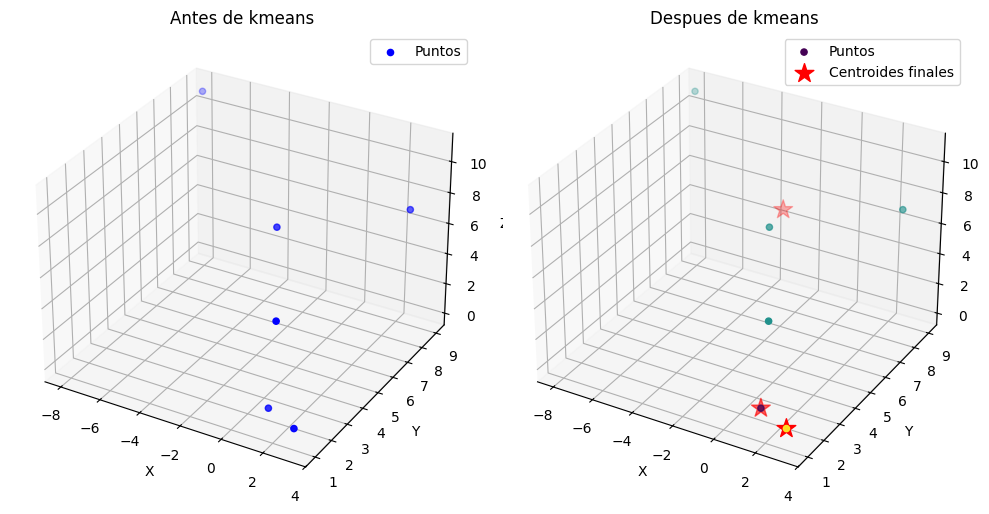

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

In [ ]:
from sklearn.datasets import make_blobs
points, y = make_blobs(n_samples = 500,n_features = 2,centers = 4,random_state = 23)

In [ ]:
kmeans = KMeans(k=3)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 1 1 2 1 2 0 1 0 0 0 0 1 1 1 1 2 0 0 1 0 1 0 1 1 1 0 1 0 2 0 0 0 0 2 1 1
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 2 2 1 2 1 1 1 1 2 0 1 1 0 2 1 1 1 1 1 0 1 1 1
 0 2 2 1 1 0 1 0 1 0 1 2 1 1 2 0 1 2 0 0 1 0 2 1 1 1 1 0 1 1 1 2 2 1 2 1 1
 0 1 1 1 0 0 2 0 1 2 1 1 2 1 1 0 1 1 2 2 0 1 1 1 2 2 2 2 1 0 1 2 2 1 0 1 1
 1 1 1 0 1 1 0 2 0 1 1 2 2 1 1 1 2 1 2 2 1 1 1 1 1 2 2 0 1 1 1 0 1 2 1 2 2
 1 0 2 2 0 0 2 0 1 0 2 1 1 2 1 0 1 1 1 0 1 1 2 1 1 0 1 1 1 2 0 1 1 0 1 2 1
 2 1 0 2 1 2 0 2 1 1 1 1 1 0 1 2 1 1 1 1 0 1 1 0 0 2 1 1 1 1 2 1 2 1 2 1 0
 0 0 1 1 2 1 2 1 2 0 0 1 1 0 2 0 2 2 1 2 0 1 2 1 0 0 2 2 1 1 2 1 1 0 0 1 0
 1 2 0 1 2 1 1 0 2 1 0 1 2 1 0 2 1 1 1 2 2 1 2 0 1 1 1 1 1 0 2 1 2 1 1 1 1
 0 2 0 0 1 0 1 1 1 0 1 1 2 2 2 1 1 1 2 2 0 1 1 1 1 2 2 1 2 1 2 2 2 1 1 2 2
 0 1 2 1 0 0 1 2 2 1 0 0 1 2 1 0 0 1 1 1 1 0 0 0 1 1 0 2 1 2 1 1 1 2 0 1 2
 1 1 1 0 0 1 1 2 0 0 0 1 1 0 2 0 2 1 0 2 1 1 2 1 0 1 2 0 0 1 1 0 2 2 1 2 1
 0 0 1 2 2 0 1 0 0 1 0 1 2 2 2 1 2 1 1 1 0 0 2 1 1 1 0 0 2 0 2 0 1 1 0 1 1
 1 1 2 2 0 1 2 1 1 1 0 2 

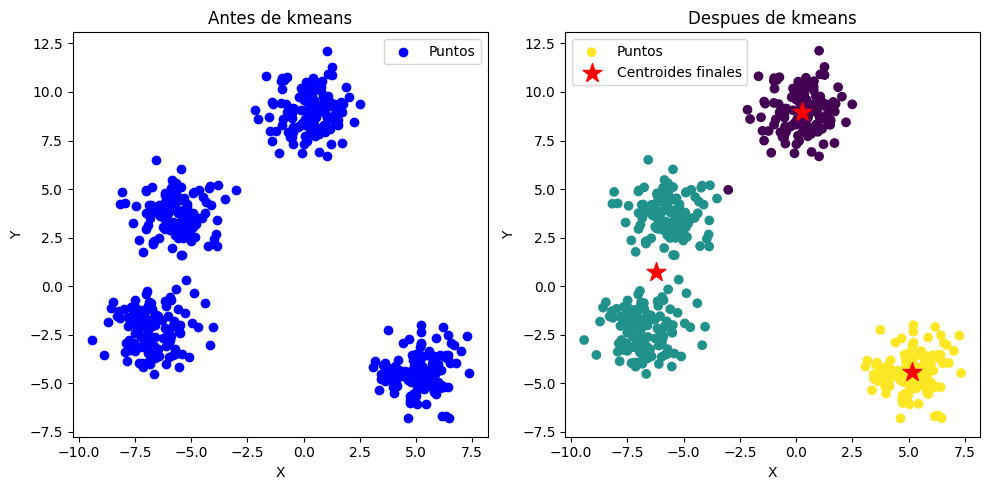

In [ ]:
dibujar2D(points, kmeans.centroids, labels)

##GRUPO 6##

--LEISER ANGARITA MELENDREZ
--ELIMELEC RUIZ QUINTERO
--ALDAIR SIERRA FONTALVO

Dimensión: 1, k: 3, Max iteraciones: 10
Centroides: [[8.82678609]
 [0.29931656]
 [5.2119059 ]]
Tiempo de ejecución: 0.10733556747436523 segundos


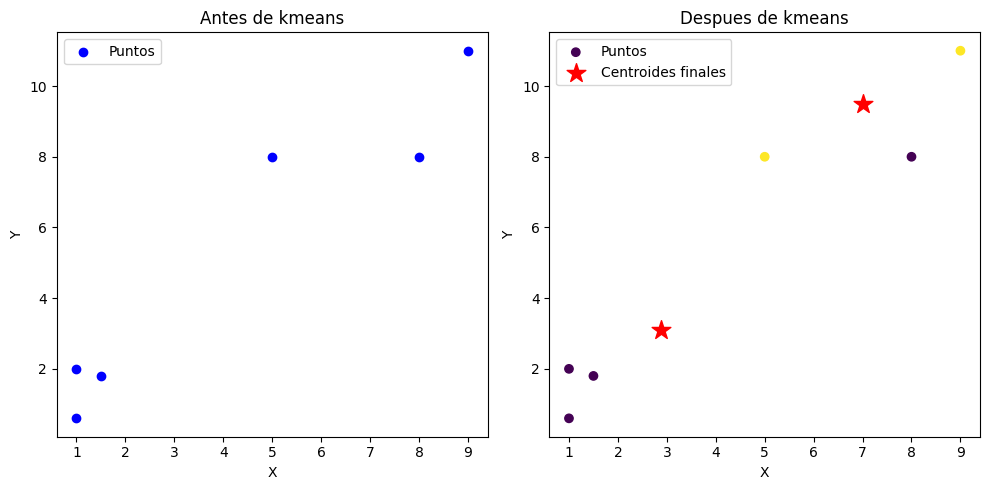

Dimensión: 1, k: 3, Max iteraciones: 100
Centroides: [[5.22826932]
 [8.84289242]
 [0.29931656]]
Tiempo de ejecución: 0.10683822631835938 segundos


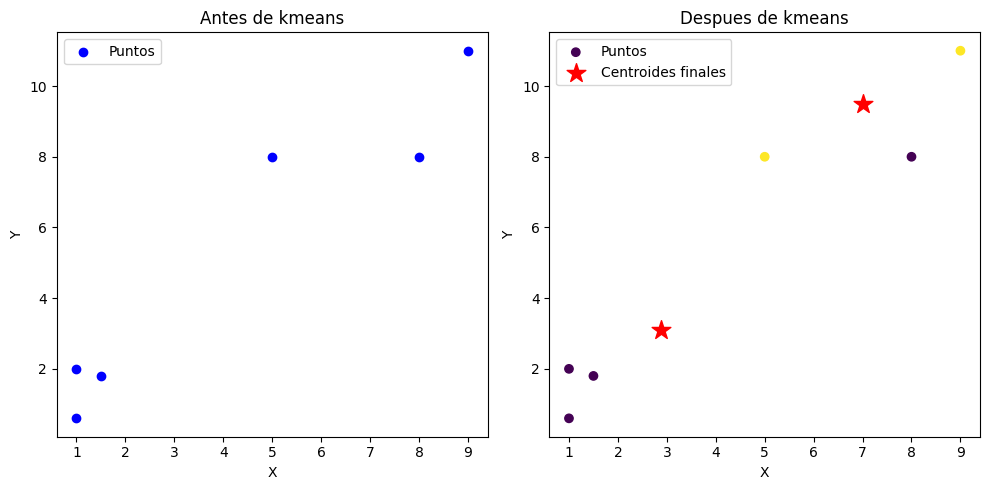

Dimensión: 1, k: 3, Max iteraciones: 1000
Centroides: [[5.2119059 ]
 [8.82678609]
 [0.29931656]]
Tiempo de ejecución: 0.14836382865905762 segundos


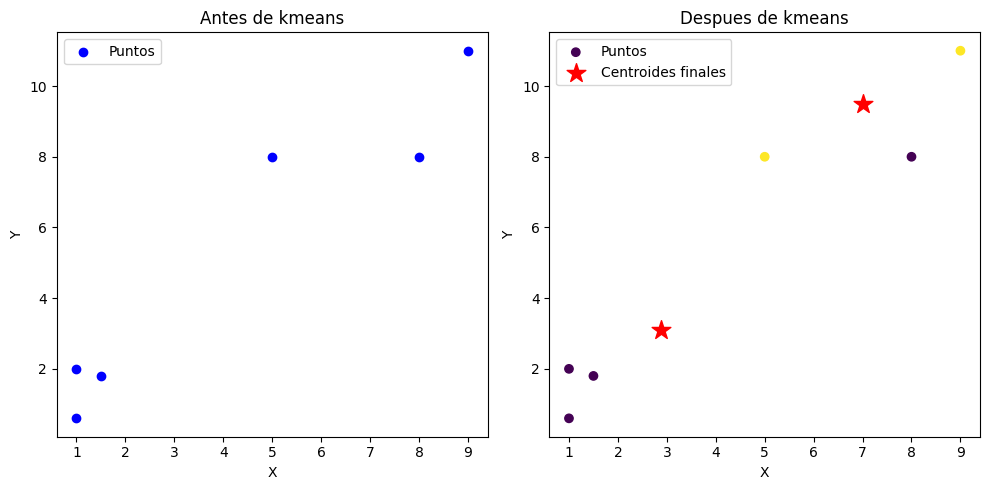

Dimensión: 1, k: 3, Max iteraciones: 10000
Centroides: [[5.2119059 ]
 [0.29931656]
 [8.82678609]]
Tiempo de ejecución: 0.31385278701782227 segundos


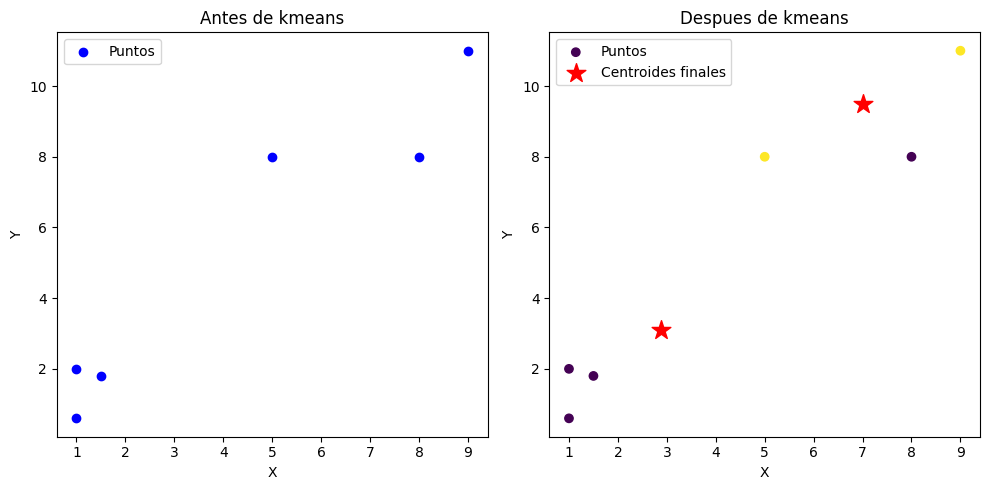

In [ ]:
## experimento 1

import numpy as np
from sklearn.datasets import make_blobs
import time

# Ejecutar el experimento
def ejecutar_experimento(dimension, k, max_iteraciones):
    points, y = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)
    kmeans = KMeans(k=k, max_iter=max_iteraciones)

    # Medir el tiempo de ejecución
    start_time = time.time()
    labels = kmeans.run(points, tipo_distance='euclidean')
    end_time = time.time()

    # Mostrar resultados
    print(f"Dimensión: {dimension}, k: {k}, Max iteraciones: {max_iteraciones}")
    print(f"Centroides: {kmeans.centroids}")
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")
    return labels

# Experimento 1, (distancia euclidiana)
for iteraciones in [10, 100, 1000, 10000]:
    # 1000 muestras, 2D, k=3
    ejecutar_experimento(1, k, iteraciones)

    dibujar2D(points, kmeans.centroids, labels)



Dimensión: 3, k: 3, Max iteraciones: 10
Centroides: [[-6.60269143 -2.21779638  2.2355186 ]
 [ 0.33414637  8.82476131  5.25371625]
 [-4.28425363 -5.58624427  3.75658525]]
Tiempo de ejecución: 0.0025131702423095703 segundos


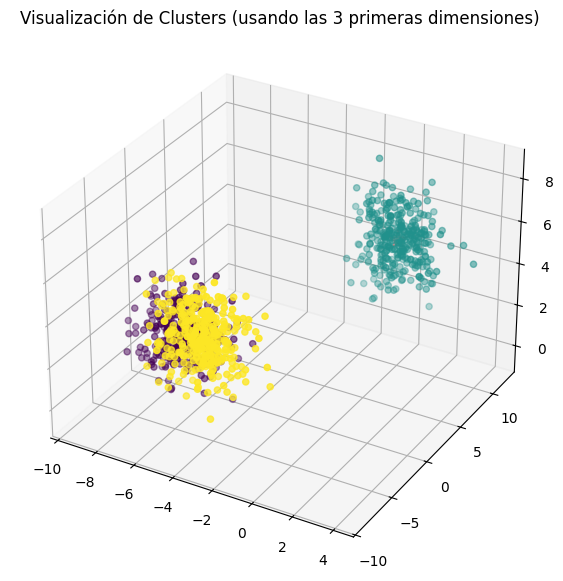

Dimensión: 3, k: 3, Max iteraciones: 100
Centroides: [[-6.60269143 -2.21779638  2.2355186 ]
 [ 0.33414637  8.82476131  5.25371625]
 [-4.28425363 -5.58624427  3.75658525]]
Tiempo de ejecución: 0.0019352436065673828 segundos


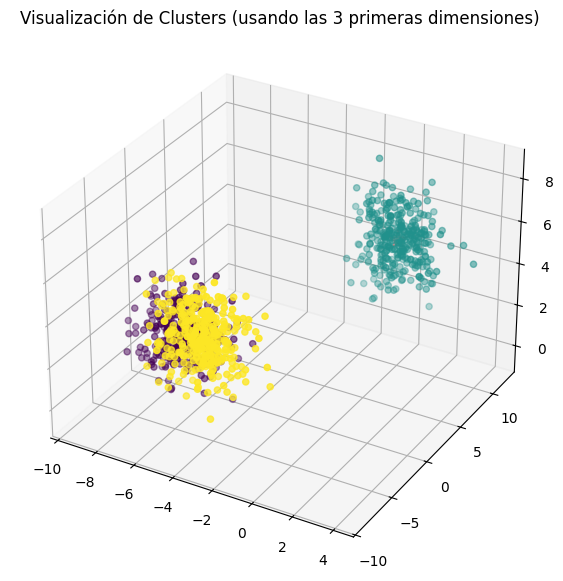

Dimensión: 3, k: 3, Max iteraciones: 1000
Centroides: [[-6.59483793 -2.22063733  2.23633233]
 [ 0.33414637  8.82476131  5.25371625]
 [-4.28506678 -5.59347919  3.76031304]]
Tiempo de ejecución: 0.0029296875 segundos


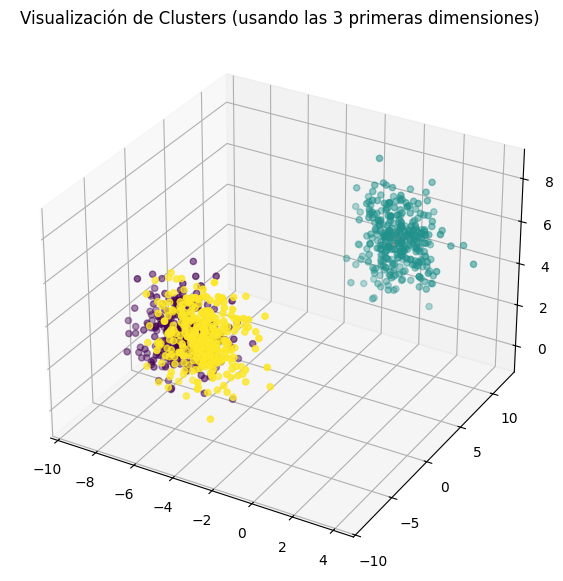

Dimensión: 3, k: 3, Max iteraciones: 10000
Centroides: [[ 0.33414637  8.82476131  5.25371625]
 [-4.28425363 -5.58624427  3.75658525]
 [-6.60269143 -2.21779638  2.2355186 ]]
Tiempo de ejecución: 0.002416849136352539 segundos


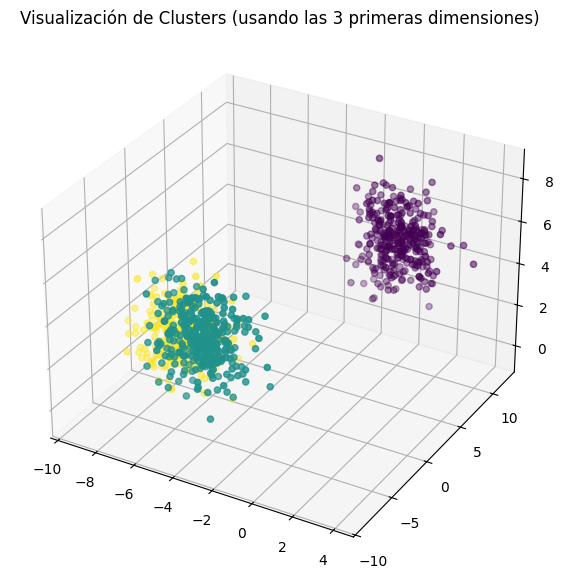

In [ ]:
## Expermento 2

import numpy as np
from sklearn.datasets import make_blobs
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as sk_KMeans
from mpl_toolkits.mplot3d import Axes3D

# Función para ejecutar el experimento
def ejecutar_experimento(dimension, k, max_iteraciones):
    points, _ = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)

    # Inicializar el modelo KMeans de sklearn
    kmeans = sk_KMeans(n_clusters=k, max_iter=max_iteraciones)

    # Medir el tiempo de ejecución
    start_time = time.time()
    kmeans.fit(points)
    end_time = time.time()

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_  # Obtener los centroides
    # Mostrar resultados
    print(f"Dimensión: {dimension}, k: {k}, Max iteraciones: {max_iteraciones}")
    print(f"Centroides: {centroids}")
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")

    return points, labels, centroids  # Retornar los resultados

# Función para visualizar los resultados en 3D
def dibujar3D(points, centroids, labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos usando las 3 primeras dimensiones
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis')
    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200)

    plt.title("Visualización de Clusters (usando las 3 primeras dimensiones)")
    plt.show()

# Ejecutar el algoritmo para diferentes valores de max_iteraciones
k = 3
for iteraciones in [10, 100, 1000, 10000]:
    points, labels, centroids = ejecutar_experimento(3, k, iteraciones)  # Obtener resultados
    dibujar3D(points, centroids, labels)  # Llamar a la función de visualización


Ejecutando experimento con max_iteraciones = 10
Dimensión: 10, k: 3, Max iteraciones: 10
Centroides: [[-10.00478871   7.60152125   7.67276816  -4.00037467   1.77988492
    9.62724893   6.8691612   -8.63395121  -4.10385482  -4.16369038]
 [  6.4126061    2.46402263  -7.79440717  -9.96267713   8.82275257
   -7.18208844  -1.57493005  -3.10397902   7.32179025  -1.41594148]
 [  0.31689436   8.78243963   5.26004414  -4.37781015  -5.7138244
    3.80309437  -6.71473453  -2.08782141   2.28760659  -1.84427594]]
Tiempo de ejecución: 0.0026624202728271484 segundos


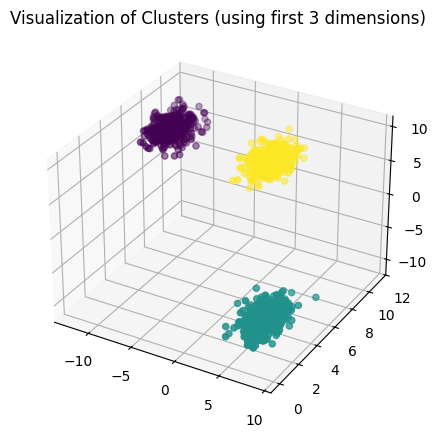

Ejecutando experimento con max_iteraciones = 100
Dimensión: 10, k: 3, Max iteraciones: 100
Centroides: [[-10.00478871   7.60152125   7.67276816  -4.00037467   1.77988492
    9.62724893   6.8691612   -8.63395121  -4.10385482  -4.16369038]
 [  6.4126061    2.46402263  -7.79440717  -9.96267713   8.82275257
   -7.18208844  -1.57493005  -3.10397902   7.32179025  -1.41594148]
 [  0.31689436   8.78243963   5.26004414  -4.37781015  -5.7138244
    3.80309437  -6.71473453  -2.08782141   2.28760659  -1.84427594]]
Tiempo de ejecución: 0.002267599105834961 segundos


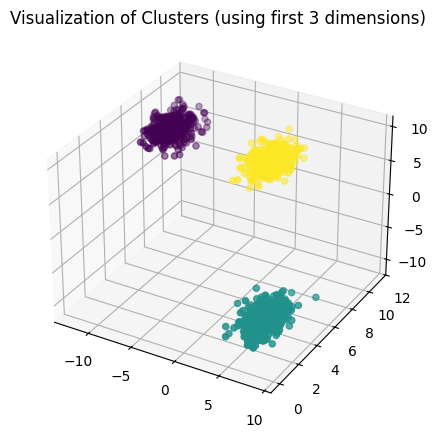

Ejecutando experimento con max_iteraciones = 1000
Dimensión: 10, k: 3, Max iteraciones: 1000
Centroides: [[-10.00478871   7.60152125   7.67276816  -4.00037467   1.77988492
    9.62724893   6.8691612   -8.63395121  -4.10385482  -4.16369038]
 [  6.4126061    2.46402263  -7.79440717  -9.96267713   8.82275257
   -7.18208844  -1.57493005  -3.10397902   7.32179025  -1.41594148]
 [  0.31689436   8.78243963   5.26004414  -4.37781015  -5.7138244
    3.80309437  -6.71473453  -2.08782141   2.28760659  -1.84427594]]
Tiempo de ejecución: 0.002918720245361328 segundos


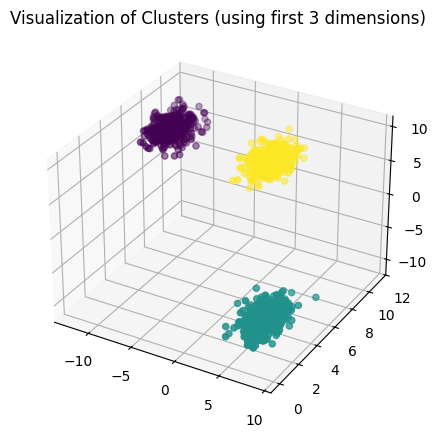

Ejecutando experimento con max_iteraciones = 10000
Dimensión: 10, k: 3, Max iteraciones: 10000
Centroides: [[-10.00478871   7.60152125   7.67276816  -4.00037467   1.77988492
    9.62724893   6.8691612   -8.63395121  -4.10385482  -4.16369038]
 [  6.4126061    2.46402263  -7.79440717  -9.96267713   8.82275257
   -7.18208844  -1.57493005  -3.10397902   7.32179025  -1.41594148]
 [  0.31689436   8.78243963   5.26004414  -4.37781015  -5.7138244
    3.80309437  -6.71473453  -2.08782141   2.28760659  -1.84427594]]
Tiempo de ejecución: 0.002665996551513672 segundos


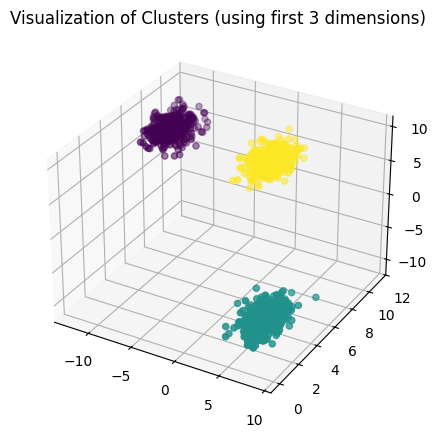

In [ ]:
## Expermento 3

import numpy as np
from sklearn.datasets import make_blobs
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


# Ejecutar el experimento con diferentes configuraciones de parámetros
def ejecutar_experimento(dimension, k, max_iteraciones):
    # Generar los puntos de datos con make_blobs
    points, y = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)

    # Inicializar el modelo KMeans de sklearn
    kmeans = KMeans(n_clusters=k, max_iter=max_iteraciones, random_state=23)

    # Medir el tiempo de ejecución
    start_time = time.time()
    kmeans.fit(points)
    end_time = time.time()

    # Mostrar resultados
    print(f"Dimensión: {dimension}, k: {k}, Max iteraciones: {max_iteraciones}")
    print(f"Centroides: {kmeans.cluster_centers_}")
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")

    return kmeans.labels_, points, kmeans.cluster_centers_


# Función para dibujar en 3D los resultados
def dibujar10D(points, centroids, labels):
    """Visualiza los clusters en 3D (como proxy de 10D)."""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis')
    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200)  # Usar las 3 primeras dimensiones
    plt.title("Visualization of Clusters (using first 3 dimensions)")
    plt.show()


# Realizar los experimentos con diferentes valores de iteraciones
for iteraciones in [10, 100, 1000, 10000]:
    print(f"Ejecutando experimento con max_iteraciones = {iteraciones}")
    # 1000 muestras, 10D, k=3
    labels, points, centroids = ejecutar_experimento(10, 3, iteraciones)

    # Dibujar los resultados utilizando solo las primeras 3 dimensiones (como proxy de las 10D)
    dibujar10D(points, centroids, labels)


Ejecutando experimento con max_iteraciones = 10
Dimensión: 100, k: 3, Max iteraciones: 10
Centroides: [[  2.95299578   1.42047239  -5.17512645  -4.05098106  -9.87616995
   -7.42978699   0.55559856   2.85575104  -7.09869061   3.81611434
    2.04321949   9.26378557   6.77552795   0.38495406   2.09567274
   -8.39580824   9.0542924    7.87919548   1.17656618  -4.41884522
    2.78664143  -1.58895333   2.55254928  -2.07354508  -3.90102755
   -1.99750242   7.05381899   6.79009299  -4.33105896  -3.26933821
   -0.34150628  -2.28074285  -3.43148036   0.61406233  -8.15599635
   -9.51409024  -6.10928347   9.23453614   5.20438958   0.35904137
   -7.5803715    9.99981782   7.76340138   9.25950584   1.27868269
   -4.12793758  -6.294239     5.62017852  -6.92440435   2.10504724
    4.73530012   1.27887581   5.9431968    8.59315743  -8.3264845
   -7.73385016  -7.76298306  -4.28120471   1.00304586  -1.17653868
   -1.11086491   3.67592256  -7.05254113  -7.69143666  -7.19187416
    6.92426572  -2.42924815 

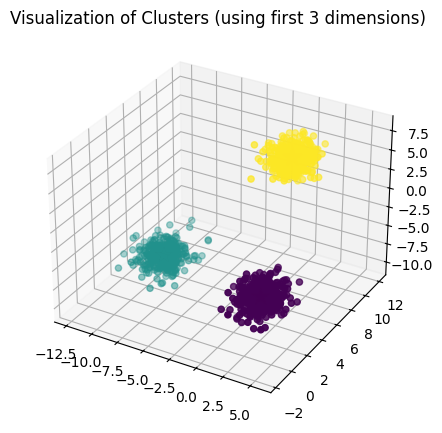

Ejecutando experimento con max_iteraciones = 100
Dimensión: 100, k: 3, Max iteraciones: 100
Centroides: [[  2.95299578   1.42047239  -5.17512645  -4.05098106  -9.87616995
   -7.42978699   0.55559856   2.85575104  -7.09869061   3.81611434
    2.04321949   9.26378557   6.77552795   0.38495406   2.09567274
   -8.39580824   9.0542924    7.87919548   1.17656618  -4.41884522
    2.78664143  -1.58895333   2.55254928  -2.07354508  -3.90102755
   -1.99750242   7.05381899   6.79009299  -4.33105896  -3.26933821
   -0.34150628  -2.28074285  -3.43148036   0.61406233  -8.15599635
   -9.51409024  -6.10928347   9.23453614   5.20438958   0.35904137
   -7.5803715    9.99981782   7.76340138   9.25950584   1.27868269
   -4.12793758  -6.294239     5.62017852  -6.92440435   2.10504724
    4.73530012   1.27887581   5.9431968    8.59315743  -8.3264845
   -7.73385016  -7.76298306  -4.28120471   1.00304586  -1.17653868
   -1.11086491   3.67592256  -7.05254113  -7.69143666  -7.19187416
    6.92426572  -2.4292481

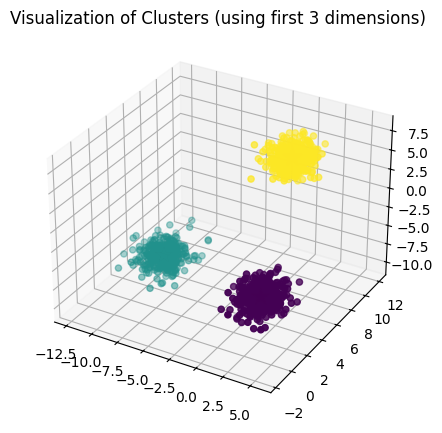

Ejecutando experimento con max_iteraciones = 1000
Dimensión: 100, k: 3, Max iteraciones: 1000
Centroides: [[  2.95299578   1.42047239  -5.17512645  -4.05098106  -9.87616995
   -7.42978699   0.55559856   2.85575104  -7.09869061   3.81611434
    2.04321949   9.26378557   6.77552795   0.38495406   2.09567274
   -8.39580824   9.0542924    7.87919548   1.17656618  -4.41884522
    2.78664143  -1.58895333   2.55254928  -2.07354508  -3.90102755
   -1.99750242   7.05381899   6.79009299  -4.33105896  -3.26933821
   -0.34150628  -2.28074285  -3.43148036   0.61406233  -8.15599635
   -9.51409024  -6.10928347   9.23453614   5.20438958   0.35904137
   -7.5803715    9.99981782   7.76340138   9.25950584   1.27868269
   -4.12793758  -6.294239     5.62017852  -6.92440435   2.10504724
    4.73530012   1.27887581   5.9431968    8.59315743  -8.3264845
   -7.73385016  -7.76298306  -4.28120471   1.00304586  -1.17653868
   -1.11086491   3.67592256  -7.05254113  -7.69143666  -7.19187416
    6.92426572  -2.42924

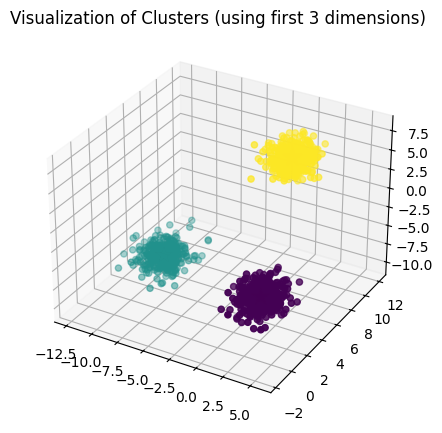

Ejecutando experimento con max_iteraciones = 10000
Dimensión: 100, k: 3, Max iteraciones: 10000
Centroides: [[  2.95299578   1.42047239  -5.17512645  -4.05098106  -9.87616995
   -7.42978699   0.55559856   2.85575104  -7.09869061   3.81611434
    2.04321949   9.26378557   6.77552795   0.38495406   2.09567274
   -8.39580824   9.0542924    7.87919548   1.17656618  -4.41884522
    2.78664143  -1.58895333   2.55254928  -2.07354508  -3.90102755
   -1.99750242   7.05381899   6.79009299  -4.33105896  -3.26933821
   -0.34150628  -2.28074285  -3.43148036   0.61406233  -8.15599635
   -9.51409024  -6.10928347   9.23453614   5.20438958   0.35904137
   -7.5803715    9.99981782   7.76340138   9.25950584   1.27868269
   -4.12793758  -6.294239     5.62017852  -6.92440435   2.10504724
    4.73530012   1.27887581   5.9431968    8.59315743  -8.3264845
   -7.73385016  -7.76298306  -4.28120471   1.00304586  -1.17653868
   -1.11086491   3.67592256  -7.05254113  -7.69143666  -7.19187416
    6.92426572  -2.429

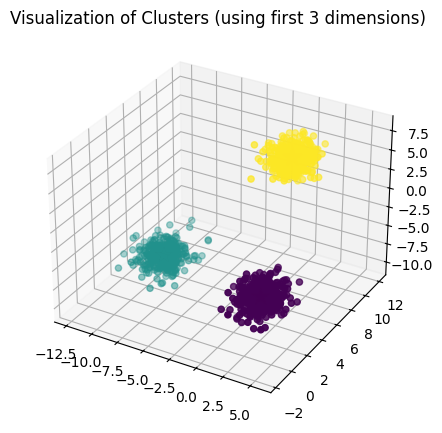

In [ ]:
## Expermento 4

import numpy as np
from sklearn.datasets import make_blobs
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


# Ejecutar el experimento con diferentes configuraciones de parámetros
def ejecutar_experimento(dimension, k, max_iteraciones):
    # Generar los puntos de datos con make_blobs
    points, y = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)

    # Inicializar el modelo KMeans de sklearn
    kmeans = KMeans(n_clusters=k, max_iter=max_iteraciones, random_state=23)

    # Medir el tiempo de ejecución
    start_time = time.time()
    kmeans.fit(points)  # Ajustar el modelo a los puntos
    end_time = time.time()

    # Mostrar resultados
    print(f"Dimensión: {dimension}, k: {k}, Max iteraciones: {max_iteraciones}")
    print(f"Centroides: {kmeans.cluster_centers_}")
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")

    return kmeans.labels_, points, kmeans.cluster_centers_


# Función para dibujar en 3D los resultados
def dibujar100D(points, centroids, labels):
    """Visualiza los clusters en 3D (como proxy de 100D)."""
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Graficar los puntos utilizando las primeras 3 dimensiones
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis')
    # Graficar los centroides
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200)  # Usar las 3 primeras dimensiones
    plt.title("Visualization of Clusters (using first 3 dimensions)")
    plt.show()


# Realizar los experimentos con diferentes valores de iteraciones
for iteraciones in [10, 100, 1000, 10000]:
    print(f"Ejecutando experimento con max_iteraciones = {iteraciones}")
    # 1000 muestras, 100D, k=3
    labels, points, centroids = ejecutar_experimento(100, 3, iteraciones)

    # Dibujar los resultados utilizando solo las primeras 3 dimensiones (como proxy de las 100D)
    dibujar100D(points, centroids, labels)


Dimensión: 3, k: 2, Distancia: euclidiana, Max iteraciones: 1000
Centroides: [[-4.36786204 -5.65744865  3.71732961]
 [ 0.22523152  8.87625601  5.32158851]]
Tiempo de ejecución: 0.002324819564819336 segundos


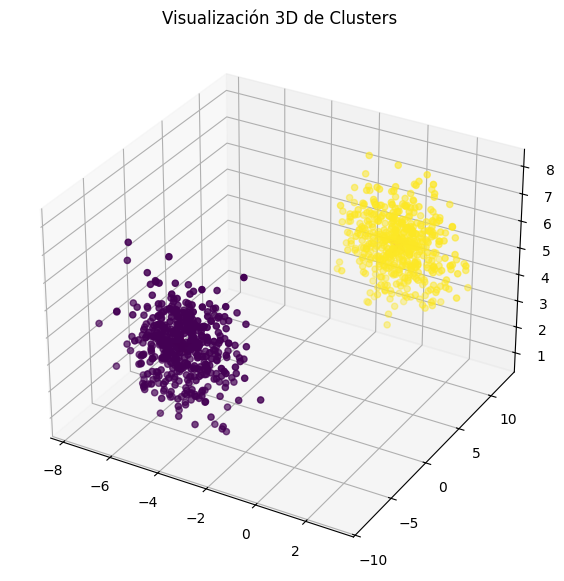

Dimensión: 3, k: 3, Distancia: euclidiana, Max iteraciones: 1000
Centroides: [[-4.28425363 -5.58624427  3.75658525]
 [ 0.33414637  8.82476131  5.25371625]
 [-6.60269143 -2.21779638  2.2355186 ]]
Tiempo de ejecución: 0.0024008750915527344 segundos


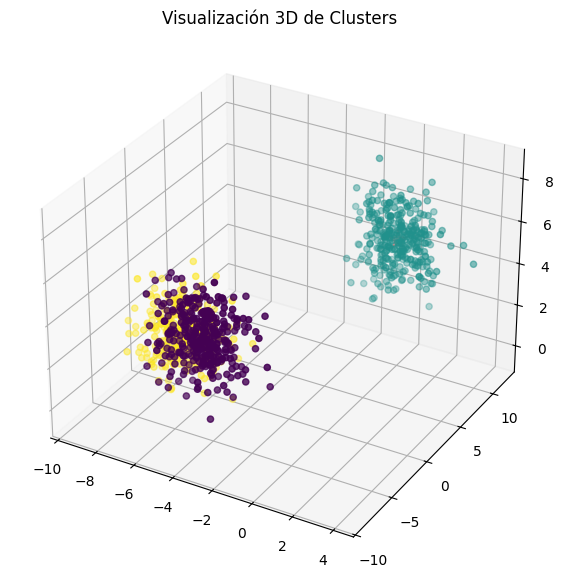

Dimensión: 3, k: 5, Distancia: euclidiana, Max iteraciones: 1000
Centroides: [[-6.58239074 -2.14394777  2.40311976]
 [ 7.58709109 -3.89953289  1.68480805]
 [-1.80201969 -9.82800453  7.62277291]
 [ 0.33469749  8.86383896  5.15222192]
 [-4.44052698 -5.55462807  3.65748551]]
Tiempo de ejecución: 0.0023746490478515625 segundos


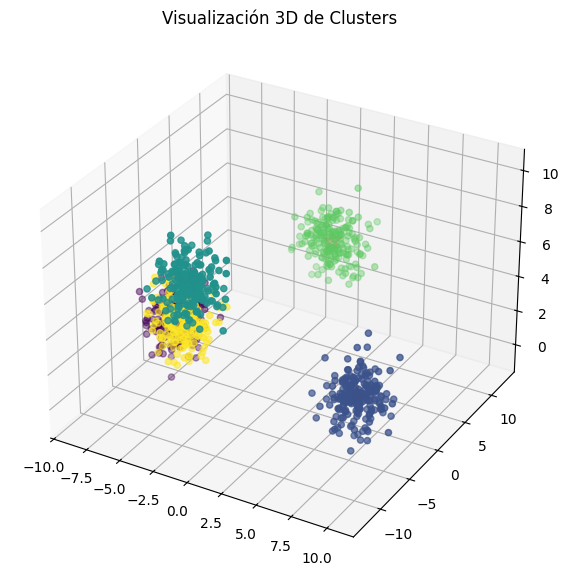

Dimensión: 3, k: 10, Distancia: euclidiana, Max iteraciones: 1000
Centroides: [[ 0.27559646  9.01673026  5.20741176]
 [-4.47538517 -5.73072249  3.57114308]
 [ 8.76033301 -7.29490135 -1.64062792]
 [-3.16106971  7.30722101 -1.52456698]
 [ 2.42937611 -7.81184481 -9.94564046]
 [ 9.49485519  7.02971617 -8.66169292]
 [-1.83481231 -9.87762099  7.41103376]
 [ 7.74108866 -3.90589276  1.66129087]
 [-6.70823295 -2.22698007  2.38921038]
 [-4.1383814  -4.15192809  6.50530365]]
Tiempo de ejecución: 0.004095554351806641 segundos


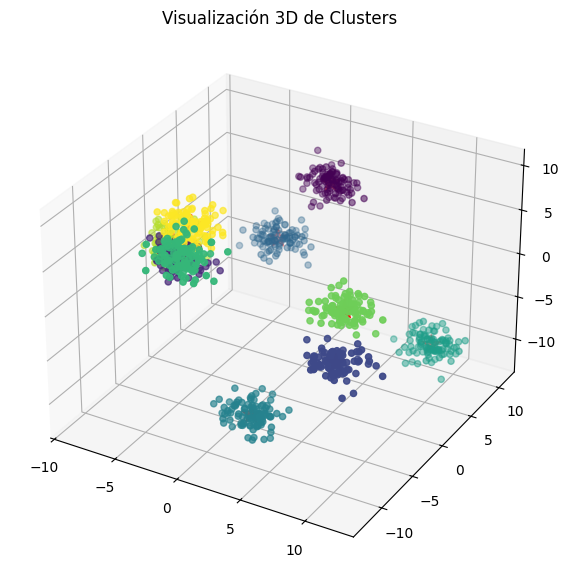

In [ ]:
## Expermento 5

import numpy as np
from sklearn.datasets import make_blobs
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as sk_KMeans
from mpl_toolkits.mplot3d import Axes3D

# Ejecutar el experimento con diferentes distancias
def ejecutar_experimento(dimension, k, max_iteraciones):
    points, _ = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)

    # Usamos KMeans estándar para distancia euclidiana
    kmeans = sk_KMeans(n_clusters=k, max_iter=max_iteraciones)

    start_time = time.time()
    kmeans.fit(points)
    end_time = time.time()

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_  # Obtener los centroides
    print(f"Dimensión: {dimension}, k: {k}, Distancia: euclidiana, Max iteraciones: {max_iteraciones}")
    print(f"Centroides: {centroids}")
    print(f"Tiempo de ejecución: {end_time - start_time} segundos")

    return points, labels, centroids

# Función para visualizar los resultados en 3D
def dibujar3D(points, centroids, labels):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200)
    plt.title("Visualización 3D de Clusters")
    plt.show()

# Primer experimento: 1000 muestras, 3D, k = 2, 3, 5, 10, distancia euclidiana, max iteraciones = 1000
k_values = [2, 3, 5, 10]
for k in k_values:
    points, labels, centroids = ejecutar_experimento(3, k, 1000)  # Ejecutar el experimento con KMeans
    dibujar3D(points, centroids, labels)  # Visualizar los resultados en 3D


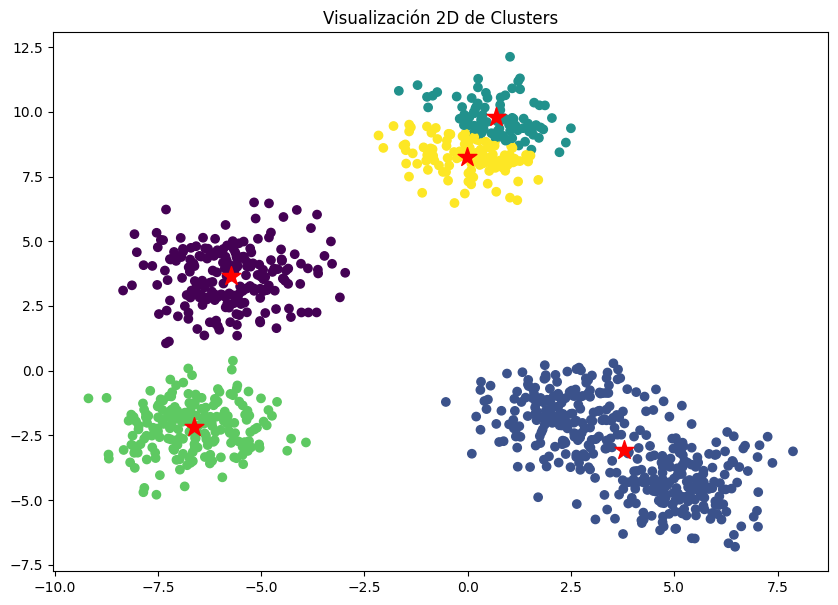

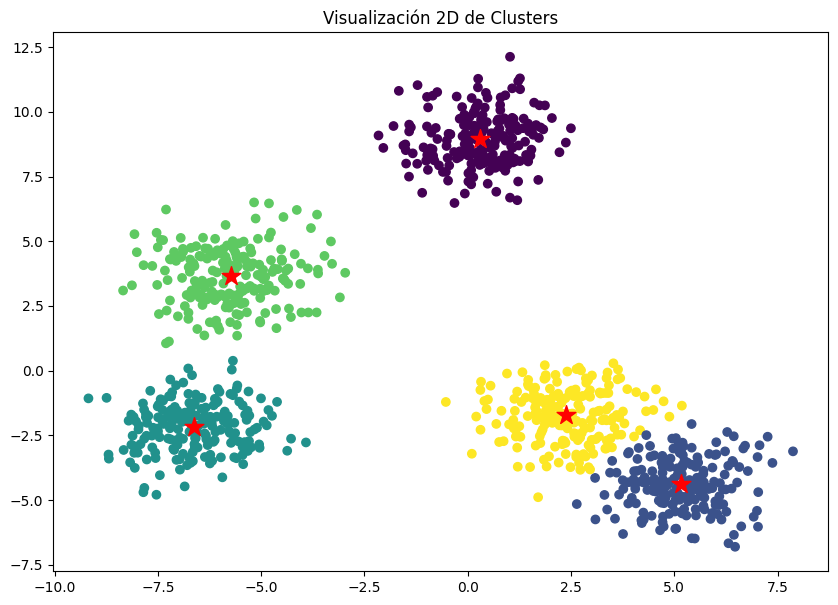

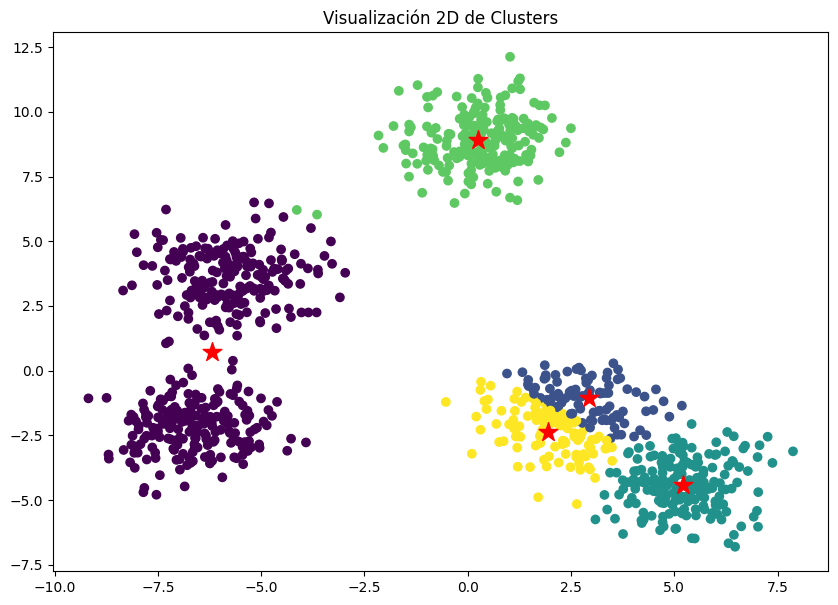

In [ ]:
## Expermento 6

import numpy as np
from sklearn.datasets import make_blobs
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Función para calcular la distancia Mahalanobis
def mahalanobis_distance(x, y, cov_matrix_inv):
    diff = x - y
    return np.sqrt(np.dot(np.dot(diff.T, cov_matrix_inv), diff))

# Implementar el KMeans con distancia Mahalanobis
def kmeans_mahalanobis(points, k, max_iteraciones):
    covariance_matrix = np.cov(points.T)
    covariance_inv = np.linalg.inv(covariance_matrix)

    # Inicialización aleatoria de los centroides
    centroids = points[np.random.choice(points.shape[0], k, replace=False)]

    for _ in range(max_iteraciones):
        # Calcular distancias Mahalanobis a cada centroide
        distances = np.array([[mahalanobis_distance(point, centroid, covariance_inv) for centroid in centroids] for point in points])
        labels = np.argmin(distances, axis=1)

        # Recalcular los centroides
        new_centroids = np.array([points[labels == j].mean(axis=0) for j in range(k)])

        # Si los centroides no cambian, hemos alcanzado la convergencia
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Ejecutar el experimento con diferentes distancias
def ejecutar_experimento(dimension, k, max_iteraciones, distance_type='euclidean'):
    points, _ = make_blobs(n_samples=1000, n_features=dimension, centers=k, random_state=23)

    if distance_type == 'mahalanobis':
        # Usar el KMeans personalizado con Mahalanobis
        labels, centroids = kmeans_mahalanobis(points, k, max_iteraciones)
    else:
        # Usar el KMeans estándar para Euclidiana y Manhattan
        kmeans = sk_KMeans(n_clusters=k, max_iter=max_iteraciones)
        kmeans.fit(points)
        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

    return points, labels, centroids

# Función para visualizar los resultados en 2D
def dibujar2D(points, centroids, labels):
    plt.figure(figsize=(10, 7))
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200)
    plt.title("Visualización 2D de Clusters")
    plt.show()

# Experimento: 1000 muestras, 2D, k = 5, distancia euclidiana, manhattan y mahalanobis, max iteraciones = 1000
k = 5  # Número de clusters
distance_types = ['euclidean', 'manhattan', 'mahalanobis']

for distance_type in distance_types:
    points, labels, centroids = ejecutar_experimento(2, k, 1000, distance_type=distance_type)  # Ejecutar el experimento
    dibujar2D(points, centroids, labels)  # Visualizar los resultados en 2D
